# Data Science Project: Analisis Data COVID19 di Dunia & ASEAN
## Data Mentor : 
**Syarif Hidayatullah** - Senior Data Consultant
Deloitte Consulting

## About This Course:
Dengan menyelesaikan module ini, kamu akan mempraktekkan proses pengambilan data melalui Python API Request. Di samping itu kamu akan belajar untuk menggunakan merge dataset menggunakan PANDAS dan membuat visualisasi menggunakan Matplotlib.   

# Pendahuluan
Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu https://covid19-api.org/.

## Library yang dibutuhkan
Pertama-tama, import terlebih dahulu library yang dibutuhkan, antara lain secara berurutan adalah
- json,
- numpy,
- pandas, dan
- requests.

Library numpy dan pandas diimport sebagai aliasnya.

In [11]:
import json
import numpy as np
import pandas as pd
import requests

# Mengakses Data Covid-19 Dari https://covid19-api.org
## Membuat Fungsi get API
Buat fungsi python get_json dengan parameter api_url. fungsi ini akan mengembalikan value berupa python dictionary jika status_code yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah None.

In [12]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

## Memanggil API Covid19

In [13]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


## Merubah Format date

In [15]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

## Mengambil Data Counties

In [16]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


# Kasus Covid-19 di Dunia dan Negara Mana yang Tertinggi
## Merge Covid19 Data dan Countries

In [17]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


## Menghitung Fatality Ratio
Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.

In [18]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

## Negara-negara dengan Fatality Ratio Tertinggi

In [19]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

## Import Library Visualisasi

In [20]:
import matplotlib.pyplot as plt

## Visualisasi Negara dengan Fatality Ratio Tertinggi

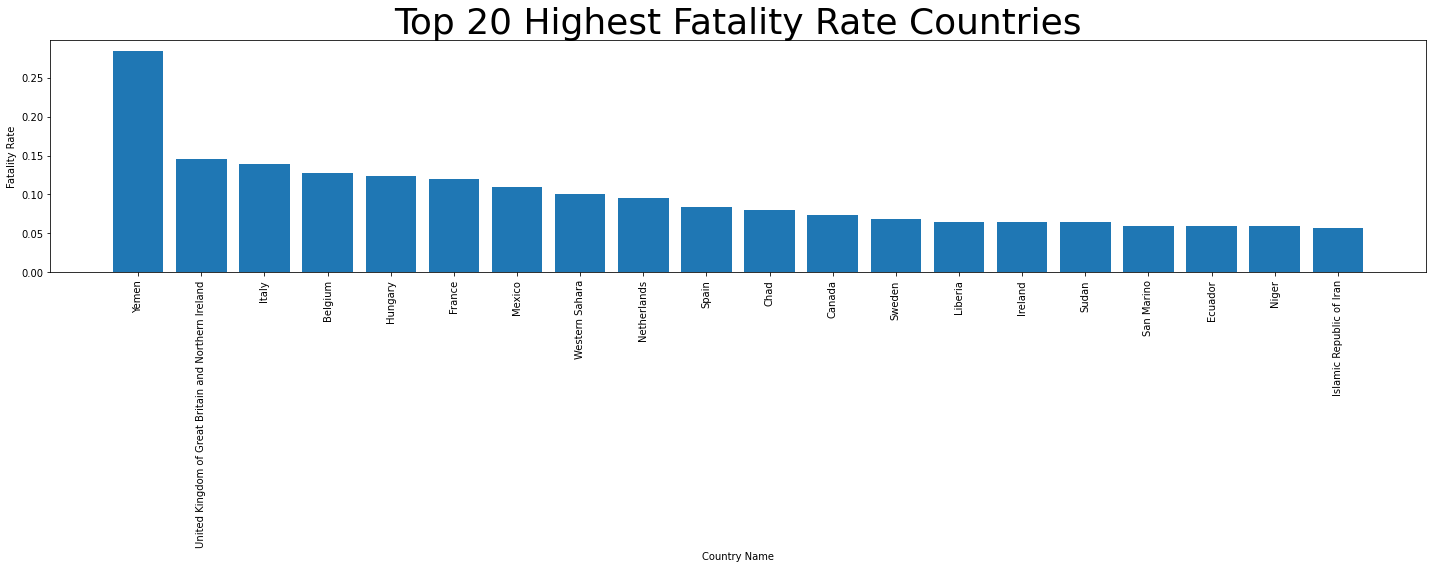

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)

plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries', fontsize = '36')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('FRC.jpg')
plt.show()

# Kasus Covid-19 di ASEAN
## Menggabungkan Dataframe
Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:

- MY -> Malaysia,
- SG -> Singapure,
- TH -> Thailand,
- VN -> Vietnam.

In [23]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1
    
print(df_covid_timeline_merged.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


  country last_update  cases  deaths  recovered
0      VN  2020-09-12   1060      35        902
1      VN  2020-09-11   1060      35        902
2      VN  2020-09-10   1059      35        893
3      VN  2020-09-09   1059      35        890
4      VN  2020-09-08   1054      35        868


## Merge Data Covid19 Dengan Data Country

In [24]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

## Kasus Covid-19 di ASEAN pada Bulan Maret 2020

In [25]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

## Visualisasi Kasus Covid-19 di ASEAN

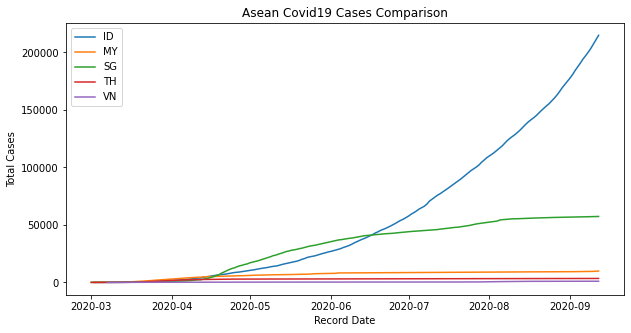

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
fig.savefig('asean covid.jpg',bbox_inches='tight', dpi=150)
plt.show()